# Machine Learning in a Nutshell with scikit-learn
    
## Unsupervised Learning: Clustering


by 

[__Michael Granitzer__ (michael.granitzer@uni-passau.de)]( http://www.mendeley.com/profiles/michael-granitzer/)

with examples taken from the scikit-learn documentation under http://scikit-learn.org/stable/


__License__

This work is licensed under a [Creative Commons Attribution 3.0 Unported License](http://creativecommons.org/licenses/by/3.0/)


## Outline

1. Overview
2. Partition-based, iterative Clustering - K-Means
3. Density based Clustering - DBSCAN
4. Evaluation Measures

# Overview

Unsupervised learning aims to find hidden structures in data. 

* **Clustering** identifies groups of similar data samples. Data samples should be maximize intra group similarity and mininmize intergroup similarity.

* **Dimensionality Projection** aims to project a high-dimensional space into a low dimensional space

* **Manifold Learning** aims to indentify lower-dimensional subspaces that contain a particular structure of data samples



## Clustering


**Clustering**: Group $n$ data samples into $k$ clusters where the similarity among samples **within a cluster is maximized** and the similarity **between cluster is minimized**

For the underlying theory please refer to Tang et. al. 2007 or the [Lecture Notes on the Course Machine Learning and Data Mining](http://www.uni-weimar.de/en/media/chairs/webis/teaching/lecturenotes/#machine-learning). Here we cover only the basics necessary and the application in scikit-learn

## Input Data

In scikit-learn, input to a clustering can take two different forms:

1. As a matrix consisting of `n_samples` and `n_features`
2. As a similarity (distance/dissimilarity) matrix of shape `[n_samples, n_samples]`

Given a **similarty measure** or **distance metric** between samples, the first approach can always be converted in the second approach. 


## Overview of clustering methods in scikit-learn

The following image gives an overview over scikit learn methods. Please note that 

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png">

Image taken from [scikit-learn](http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html). You can find the generating code under `modules/plot_cluster_comparison.py`.

For the theory behind the different methods please see the [Lecture Notes on Cluster Analysis](http://www.uni-weimar.de/en/media/chairs/webis/teaching/lecturenotes/#machine-learning)

# K-Means Clustering

k-means is an iterative, partitioning clustering algorithm that minimizes

$$J(X,C)=\sum_{i=0}^{|X|}\min_{\mu_j\in C}(||x_i-\mu_j||^2)$$

with $X$ being the samples, $C$ being the number of clusters and $\mu_j$ being the representative of a cluster $c_j\in C$.

So basically it searches for a set of clusters that minimizes the squared distances of all data points to the cluster representative. In case of k-**means** the cluster representative is the mean vector of its data points

### Algorithm Sketch

1. **Initalise** $C$ by selecting $k$ cluster representatives $\mu_1 \ldots \mu_k$
2. **Partition** the data according to the cluster representatives, i.e. assign $x_i$ to the cluster $argmin_{\mu_j\in \{\mu_1 \ldots \mu_k\}}(||x_i-\mu_j||^2) $
3. **Recalculate** the cluster representatives $\mu_1 \ldots \mu_k$ as $\mu_j=\frac{1}{|c_j|}\sum_{x_i \in c_j}x_i$
4. If the parition does not change or a number of iteration is exceeded, stop. Otherwise go to 2.

### Usage in scikit-learn

* Module: `from sklearn.cluster import KMeans`
* Instantiate a object `kmeans = KMeans(....parameters...)`
* Fit to data: `model = kmeans.fit(data)`
* Assign data to cluster: `model.predict (data)`

### Some Algorithmic Properties

* k-means is very sensitive to the starting points $\mu_i$
* k-means needs to know the number of clusters a-priori
* k-means finds only cluster of approximately similar size that induce a voronoi partition

### Exercise 1: Apply scikit-learn k-means using Random Data

In this exercise you should apply the scikit-learn k-means algorithm (`from sklearn.cluster import KMeans`) and evaluate it visually on a 2D dataset that is randomly created using a uniform and normal distribution (use `numpy.random.randn` and `numpy.random.ranf`). 

* Read on the parameter settings and try different setting to better fit the algorithm to the data. Can you find the perfect solution for **this** particular data set?
* How could you estimate the number of clusters $k$?


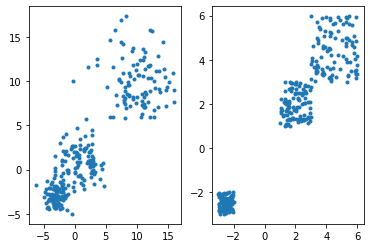

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#create the data 

# 3 normally distributed clusters
normal2D= np.array(np.random.randn(100,2))*2+1
normal2D= np.append(normal2D,np.random.randn(100,2)*3+10,axis=0)
normal2D= np.append(normal2D,np.random.randn(100,2)*1-3,axis=0)

# 3 uniform distributed clusters
uniform2D= np.array(np.random.ranf((100,2))*2+1)
uniform2D= np.append(uniform2D,np.random.ranf((100,2))*3+3,axis=0)
uniform2D= np.append(uniform2D,np.random.ranf((100,2))*1-3,axis=0)

#plot the data
plt.subplot(1,2,1)
plt.plot(normal2D[:,0],normal2D[:,1],".")
plt.subplot(1,2,2)
plt.plot(uniform2D[:,0],uniform2D[:,1],".")
plt.show()

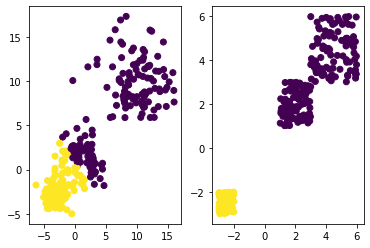

In [4]:
from sklearn.cluster import KMeans

# run K-means
kmeans = KMeans(init='random', n_clusters=2, n_init=1)
kn2d = kmeans.fit(normal2D)
ku2d = kmeans.fit(uniform2D)
labels_normal = kn2d.predict(normal2D)
labels_uniform = ku2d.predict(uniform2D)

# and plot the clusters
plt.subplot(1,2,1)
plt.scatter(normal2D[:,0],normal2D[:,1],c=labels_normal)
plt.subplot(1,2,2)
plt.scatter(uniform2D[:,0],uniform2D[:,1],c=labels_uniform)
plt.show()

# DBScan - Density-based Clustering

* Density-based Clustering aims to find regions of high density that are separated via regions of low density.
* DBScan differentiates between noise points, core points and border points by defining an $\epsilon$ environment around a point $x_i$ in which a certain number of points must exists so that $x_i$ qualifies as core point
* Border points can be ambiguos, i.e. can belong to two differnt clusters where they fall in the $\epsilon$ region (but do not form a core point)

For the theory behind the different methods please see the [Lecture Notes on Cluster Analysis](http://www.uni-weimar.de/en/media/chairs/webis/teaching/lecturenotes/#machine-learning)

#### Usage in scikit learn

Scikit implements the Ward algorithm (i.e. HAC using Ward Criterion for variance-minimization)
* Module: `from sklearn.cluster import DBSCAN`
* Instantiate a object `db = DBSCAN(....parameters...)`
* Fit to data: `model = db.fit(data)`

The implementation of the algorithm is non-deterministic, i.e. it is dependent on the order of the data. Core points of a cluster will be always assigned to the same cluster, but the cluster number might change depending which cluster core point is taken first.



### Exercise 2: Apply scikit-learn DBScan using Random Data

In this exercise you should apply the scikit-learn DBSCAN algorithm and evaluate it visually on the 2D dataset below. 

* Read on the parameter settings and try different setting to better fit the algorithm to the data. How crucial is $\epsilon$? How does the clustering results compare to the k means algorithm?
* How could you estimate $\epsilon$ and the number of points in the $\epsilon$ region?
* How good can you fit the parameter and where is the problem?

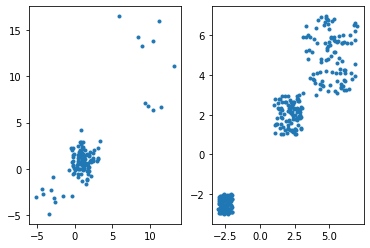

In [6]:
# create data

# 3 clusters normally distributed clusters with different densities
normal2D= np.array(np.random.randn(100,2))+1
normal2D= np.append(normal2D,np.random.randn(10,2)*3+10,axis=0)
normal2D= np.append(normal2D,np.random.randn(10,2)*1-3,axis=0)

# 3 clusters uniform distributed clusters with different densities
uniform2D= np.array(np.random.ranf((100,2))*2+1)
uniform2D= np.append(uniform2D,np.random.ranf((100,2))*4+3,axis=0)
uniform2D= np.append(uniform2D,np.random.ranf((100,2))*1-3,axis=0)

#plot the data
plt.subplot(1,2,1)
plt.plot(normal2D[:,0],normal2D[:,1],".")
plt.subplot(1,2,2)
plt.plot(uniform2D[:,0],uniform2D[:,1],".")
plt.show()

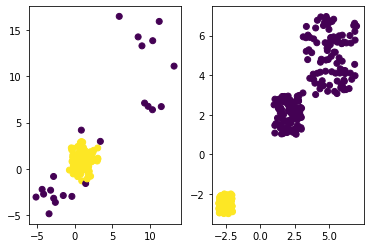

In [8]:
from sklearn.cluster import DBSCAN

# create DBScan and get the clusters
dbscan = DBSCAN(eps=1,min_samples=10)
dn2d = dbscan.fit(normal2D)

# plot it
plt.subplot(1,2,1)
plt.scatter(normal2D[:,0],normal2D[:,1],c=dn2d.labels_+1)


# Refit using the same parameters and cluster the second data set
du2d = dbscan.fit(uniform2D)

# plot it
plt.subplot(1,2,2)
plt.scatter(uniform2D[:,0],uniform2D[:,1],c=du2d.labels_+1)
plt.show()

# Clustering Evaluation


The quality of clustering has to be measured, otherwise results can be abritrary (especially for high dimensional data where visualisation of clusters is not possible)

Cluster quality measure can be distinguished between

1. **Internal Validity Indices** that indicate the quality of the shape of an cluster without relying on the correct assignment of points to cluster
2. **External Validity Indices** that rely on a given correct assignment of points to groups

These measures are often used for finding the best parameters.


### Realisation in scikit-learn

Scikit learn implements a number of validity measures. See [the tutorial](http://scikit-learn.org/stable/modules/clustering.html#clustering) for an overview. 

We will give only two examples here.

### Rand Index (External)

Given a ground truth class (i.e. data samples are assigned to classes), the rand index *compares the number of pairs* of data sample that do/do not end up togehter *in the same cluster* to the pairs that do/do not *end up togehter in a ground truth class*

Formally, 

* let $C$ be a set of ground truth classes that assignes one data sample to one class $c$. 
* let $K$ be the clustering that assignes one data sample to one cluster $k$
* let $a$ be the number of all pairs of elements that are in the same class $c\in C$ and in the same cluster $k\in K$
* let $b$ be the number of pairs of elements that are in different classes in $c\in C$ and in different clusters $k\in K$

The rand index is then defined as
$$
RI=\frac{a+b}{number\;of\;all\;pairs}
$$

In [9]:
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]

 
print("Same assignment:", metrics.adjusted_rand_score(labels_true, labels_true))
print("Good assignments: ", metrics.adjusted_rand_score(labels_true, labels_pred))
print("Bad assignment:", metrics.adjusted_rand_score(labels_true, [0,1,2,0,1,2]))

Same assignment: 1.0
Good assignments:  0.24242424242424246
Bad assignment: -0.36363636363636365


### Silhouette Coefficient (Internal)

The Silhouette Coefficient (`sklearn.metrics.silhouette_score`) is an example of an internal evaluation, where a higher Silhouette Coefficient score relates to a model with better shaped clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

* $a$: The mean distance between a sample and all other points in the same cluster.
* $b$: The mean distance between a sample and all other points in the next nearest cluster.

The Silhoeutte Coefficient s for a single sample is then given as:

$$
s=\frac{b-a}{max(a,b)}
$$

### Exercise 3: Cluster the iris data set and evaluate the result

Load the iris data set and evaluate both, shilouette coefficient and rand index with different clustering results generated either via k-means or dbscan. Compare both evaluation measures with each other over a different set of clustering result (e.g. vary k or vary $\epsilon$ and/or the number of points in the epsilon environment).

In [13]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets

dataset = datasets.load_iris()
X = dataset.data
y = dataset.target

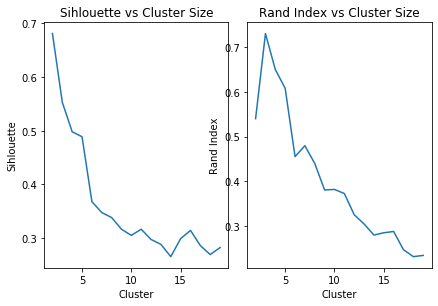

In [15]:
# we use k-means

# write the metrics here
s = []
r = []

# fit different k-means
k = range(2,20)
for i in k:
    kmeans_model = KMeans(n_clusters=i, init="k-means++").fit(X)
    labels = kmeans_model.labels_
    s.append(metrics.silhouette_score(X, labels, metric='euclidean'))
    r.append(metrics.adjusted_rand_score(y, labels) )
    
plt.subplot(1,2,1)
plt.tight_layout()
plt.plot(k,s)
plt.ylabel("Sihlouette")
plt.xlabel("Cluster")
plt.title("Sihlouette vs Cluster Size")
plt.subplot(1,2,2)
plt.plot(k,r)
plt.ylabel("Rand Index")
plt.xlabel("Cluster")
plt.title("Rand Index vs Cluster Size")
plt.show()

# Further References and Reading


- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, [Introduction to Data Mining](http://www.pearsonhighered.com/educator/academic/product/0,1144,0321321367,00.html), Addison-Wesley, 2006. ISBN 0-321-32136-7. 
- [Unsupervised learning: seeking representations of the data](http://scikit-learn.org/stable/tutorial/statistical_inference/unsupervised_learning.html), scikit-learn Tutorial, 
